In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_train = pd.read_csv("train.csv")

1. Understanding the data

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in the dataset. (rows, columns)
data_train.shape

(1460, 81)

There are total **1460 samples** which we can use to train model and **80 features** and **1 target variable**.

In [6]:
#describe gives statistical information about numerical columns in the dataset.
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(data_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
types = data_train.dtypes

pd.DataFrame(types)

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [10]:
types = types.reset_index()

In [11]:
mapping = {types.columns[0]:'Features', types.columns[1]: 'A'}

types = types.rename(columns=mapping)
types

,Features,A
0,Id,int64
1,MSSubClass,int64
2,MSZoning,object
3,LotFrontage,float64
4,LotArea,int64
...,...,...
76,MoSold,int64
77,YrSold,int64
78,SaleType,object
79,SaleCondition,object


In [12]:
print(types[types["A"] == "int64"])

         Features      A
0              Id  int64
1      MSSubClass  int64
4         LotArea  int64
17    OverallQual  int64
18    OverallCond  int64
19      YearBuilt  int64
20   YearRemodAdd  int64
34     BsmtFinSF1  int64
36     BsmtFinSF2  int64
37      BsmtUnfSF  int64
38    TotalBsmtSF  int64
43       1stFlrSF  int64
44       2ndFlrSF  int64
45   LowQualFinSF  int64
46      GrLivArea  int64
47   BsmtFullBath  int64
48   BsmtHalfBath  int64
49       FullBath  int64
50       HalfBath  int64
51   BedroomAbvGr  int64
52   KitchenAbvGr  int64
54   TotRmsAbvGrd  int64
56     Fireplaces  int64
61     GarageCars  int64
62     GarageArea  int64
66     WoodDeckSF  int64
67    OpenPorchSF  int64
68  EnclosedPorch  int64
69      3SsnPorch  int64
70    ScreenPorch  int64
71       PoolArea  int64
75        MiscVal  int64
76         MoSold  int64
77         YrSold  int64
80      SalePrice  int64


In [13]:
data_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [14]:
data_train["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [15]:
data_train["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

2.  Cleaning the data

In [16]:
#get the number of missing data points per column.
missing_data = data_train.isnull().sum().copy()

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_data)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [18]:
df = missing_data[missing_data > 0]
df

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [19]:
miss_data = data_train[["LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType2", 
      "Electrical", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", 
      "Fence", "MiscFeature"]]
miss_data

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [20]:
miss_data.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [21]:
!pip install missingno

In [22]:
import missingno as msno

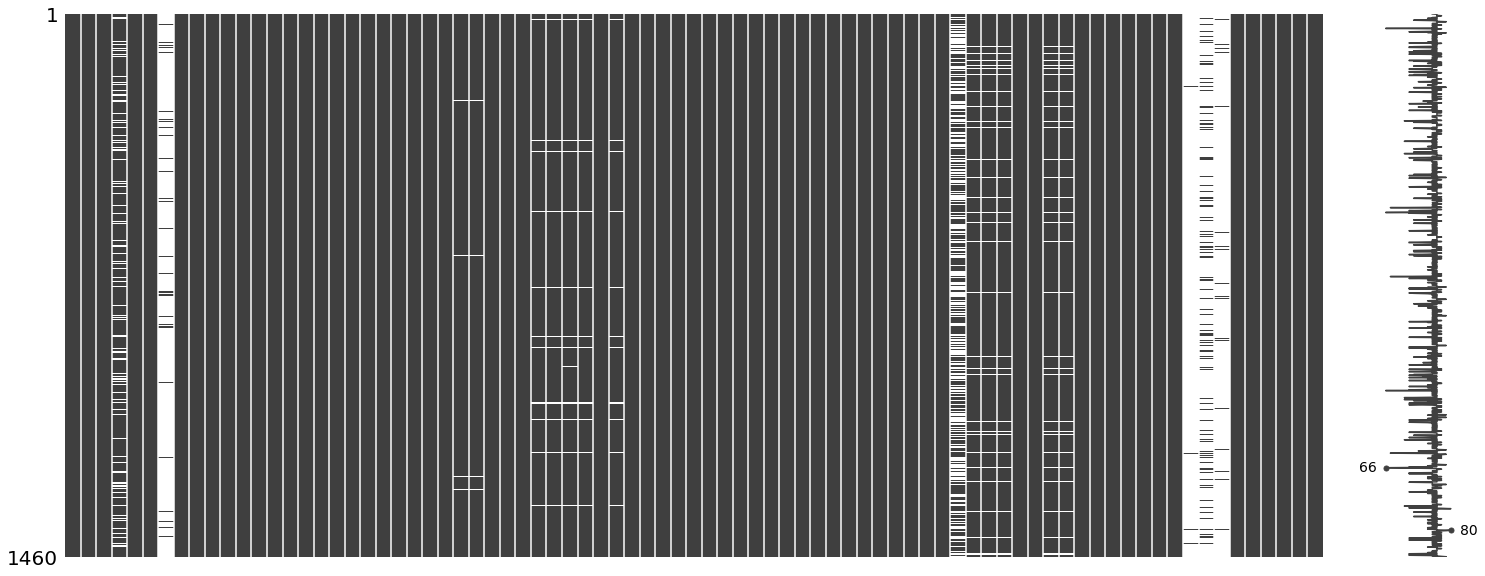

In [23]:
msno.matrix(data_train);

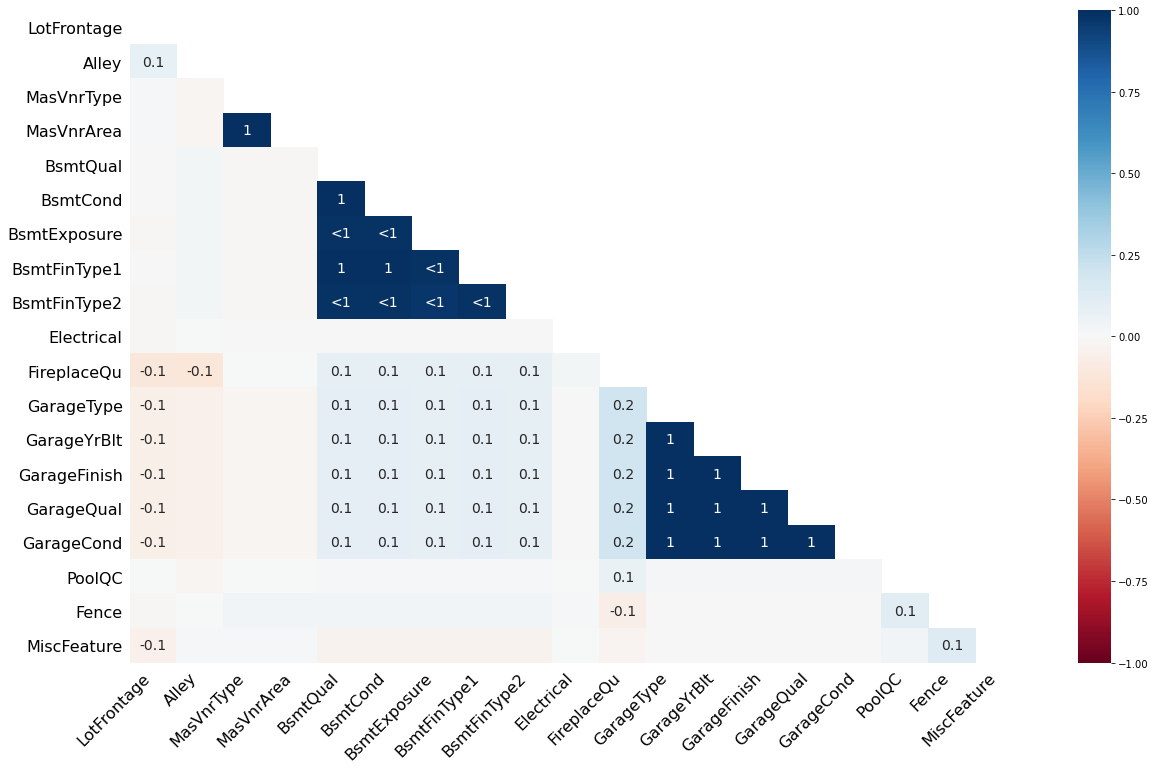

In [24]:
msno.heatmap(data_train);

In [25]:
data_train["LotFrontage"] = data_train["LotFrontage"].fillna(data_train["LotFrontage"].mean())
data_train["MasVnrArea"] = data_train["MasVnrArea"].fillna(data_train["MasVnrArea"].mean())
data_train["GarageYrBlt"] = data_train["GarageYrBlt"].fillna(data_train["GarageYrBlt"].mean())

In [26]:
data_train.drop(columns = ["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [27]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


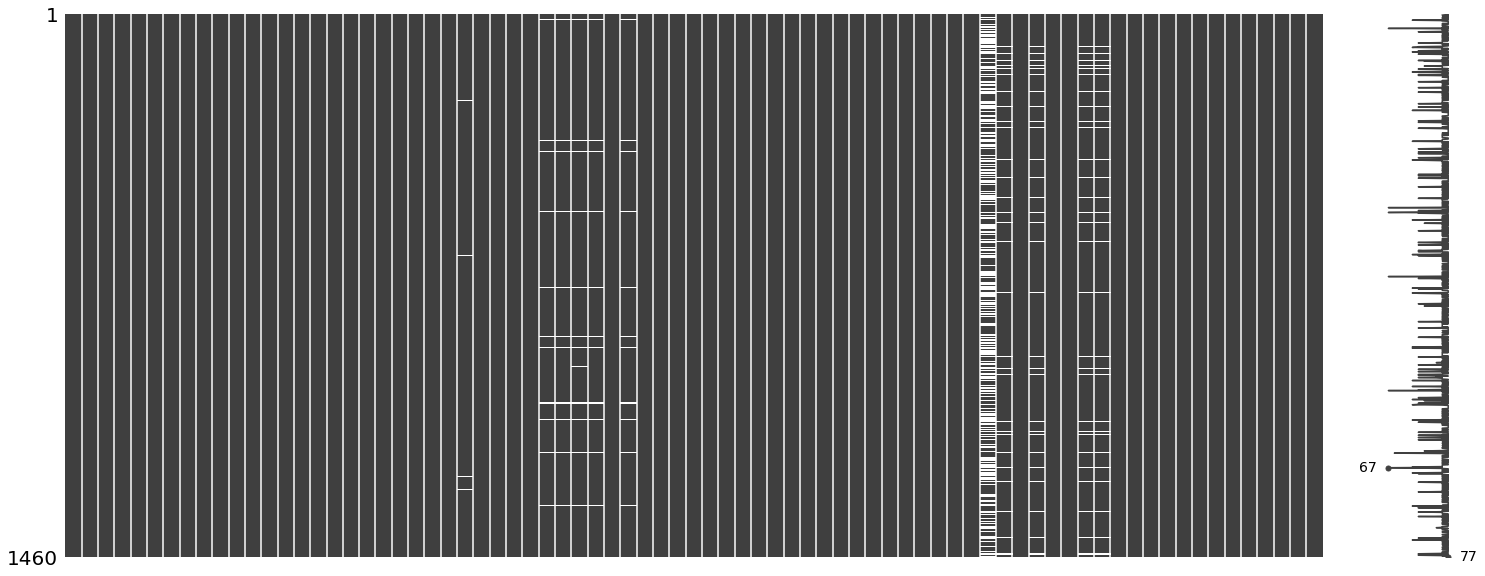

In [28]:
msno.matrix(data_train);

In [29]:
data_train = data_train.fillna("None")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [30]:
numeric = data_train.select_dtypes(include = ["int64", "float64"])
numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [31]:
cat = data_train.select_dtypes(include = ["object"])
cat.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,WD,Normal


In [32]:
cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
#Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
data_train[cat.columns] = data_train[cat.columns].apply(le.fit_transform)

In [35]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(data_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32


3.  Checking highly correlated features with the target variable

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

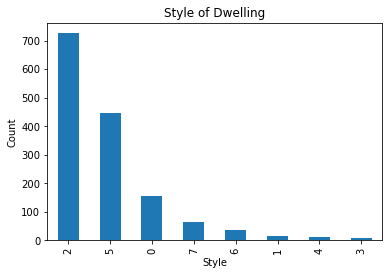

In [38]:
data_train["HouseStyle"].value_counts().plot(kind="bar")
plt.title("Style of Dwelling")
plt.xlabel("Style")
plt.ylabel("Count")
plt.show()

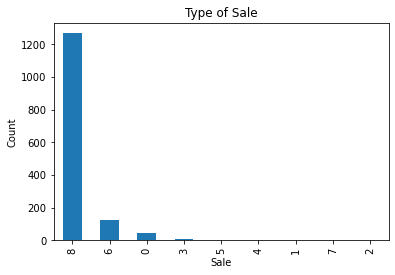

In [39]:
data_train["SaleType"].value_counts().plot(kind="bar")
plt.title("Type of Sale")
plt.xlabel("Sale")
plt.ylabel("Count")
plt.show()

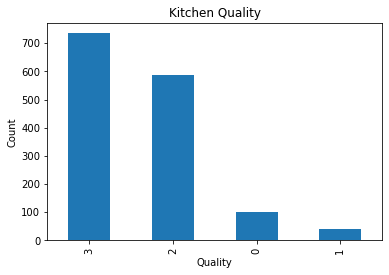

In [40]:
data_train["KitchenQual"].value_counts().plot(kind="bar")
plt.title("Kitchen Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

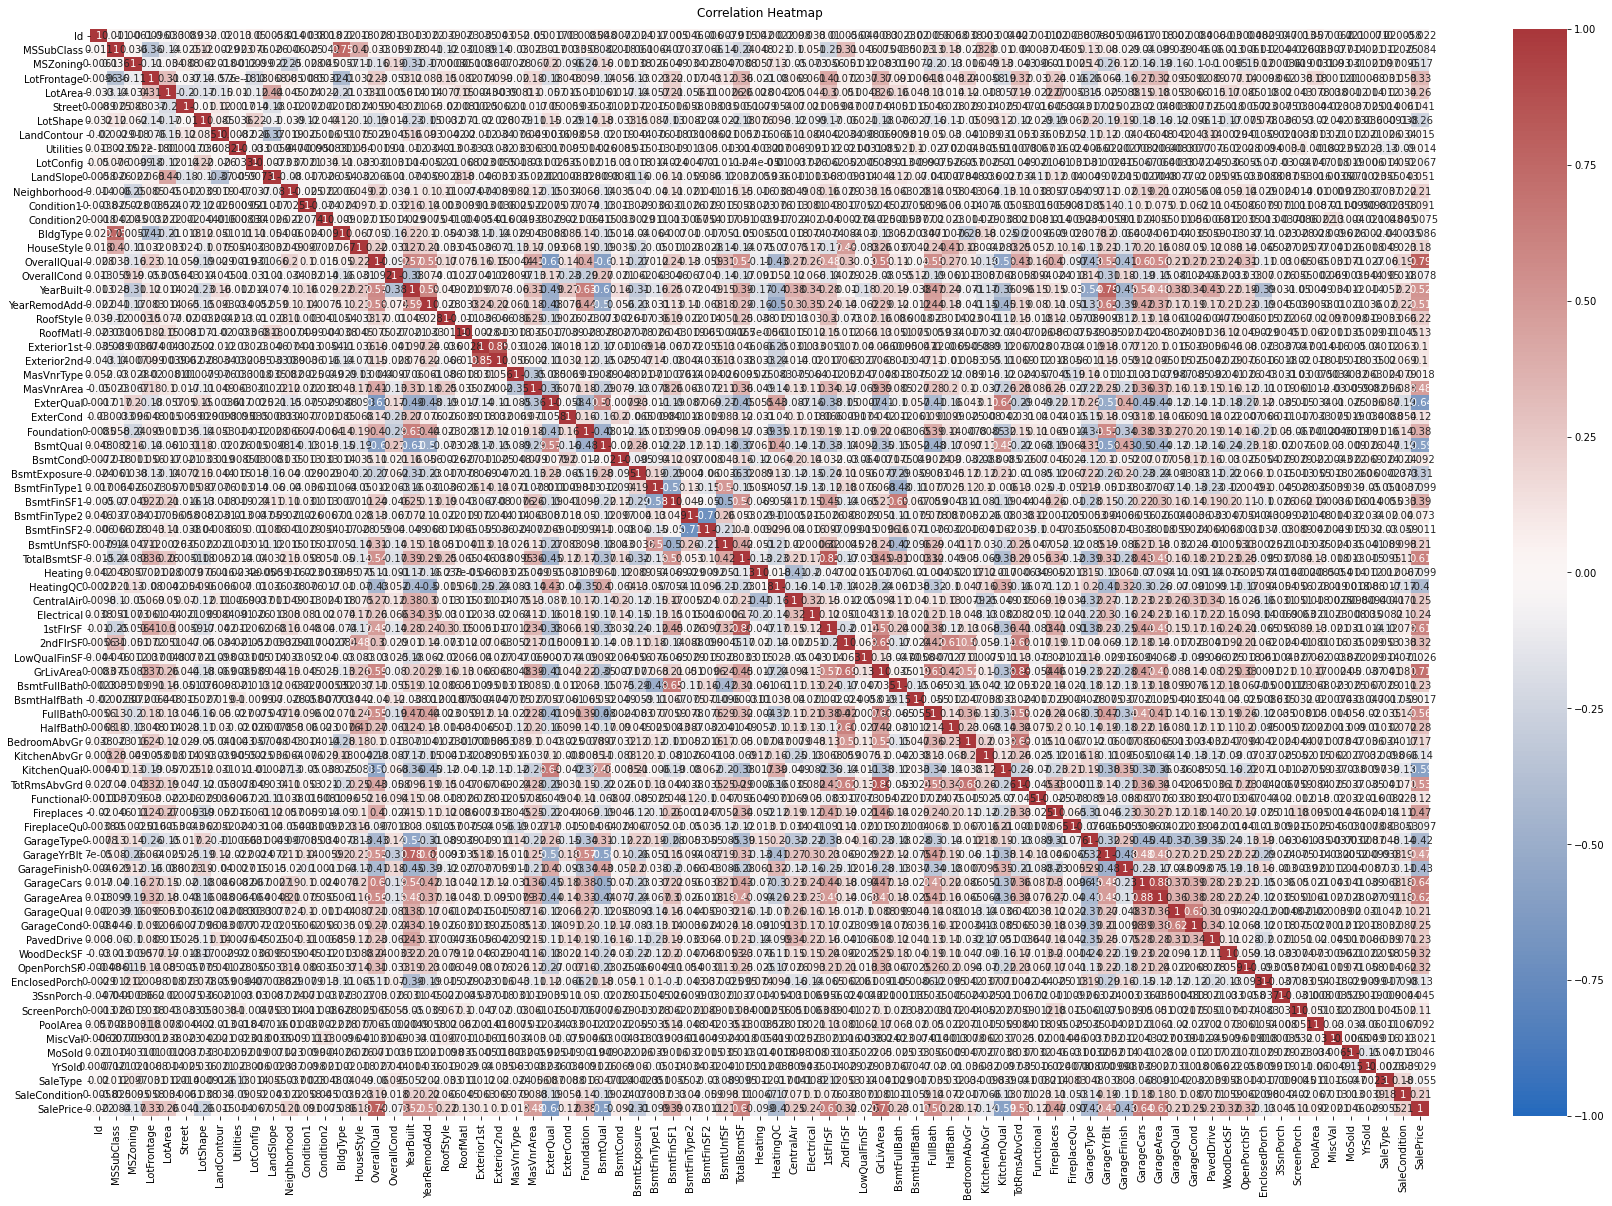

In [41]:
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(data_train.corr(), vmin=-1, vmax=1, annot=True, cmap="vlag")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [42]:
data_train[data_train.columns[:]].corr()["SalePrice"][:].sort_values(ascending = False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

3.1 Feature Selection for numeric variables to icrease robustness of our model

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = pd.DataFrame(scaler.fit_transform(numeric), columns = numeric.columns)
numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


In [44]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(1)
selector.fit(numeric)
numeric.columns[selector.get_support()]

Index(['OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd',
       'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'MoSold'],
      dtype='object')

In [45]:
numeric.drop(columns = ['OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd',
       'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'MoSold']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'EnclosedPorch', '3SsnPorch',
       'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

4. Cleaning the test data

In [46]:
data_test = pd.read_csv("test.csv")

In [47]:
data_test.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(data_test.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [49]:
missing_tdata = data_test.isnull().sum().copy()

In [50]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_tdata)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [51]:
df2 = missing_tdata[missing_tdata > 0]
df2

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [52]:
miss_data2 = data_test[["MSZoning", "LotFrontage", "Alley", "Utilities", "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", 
      "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond", "PoolQC", 
      "Fence", "MiscFeature", "SaleType"]]
miss_data2

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,...,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,None,0.0,Gd,TA,...,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
1455,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
1456,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD
1457,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD


In [53]:
miss_data2.dtypes

MSZoning         object
LotFrontage     float64
Alley            object
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
dtype: object

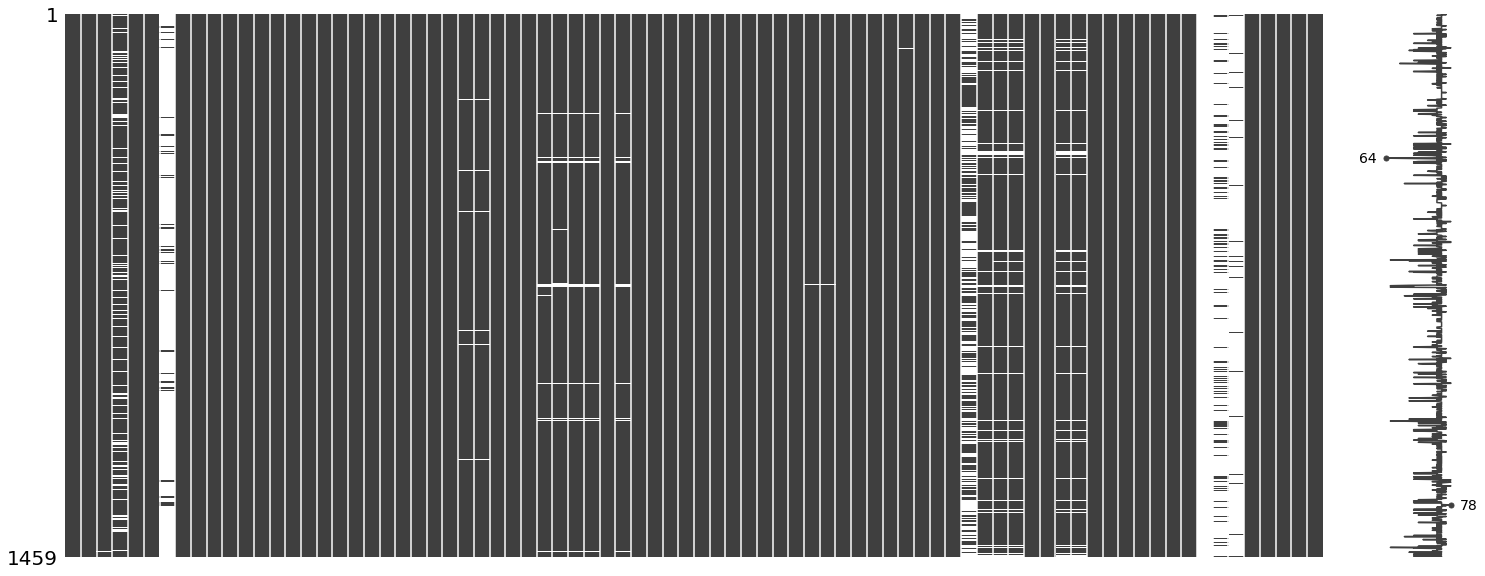

In [54]:
msno.matrix(data_test);

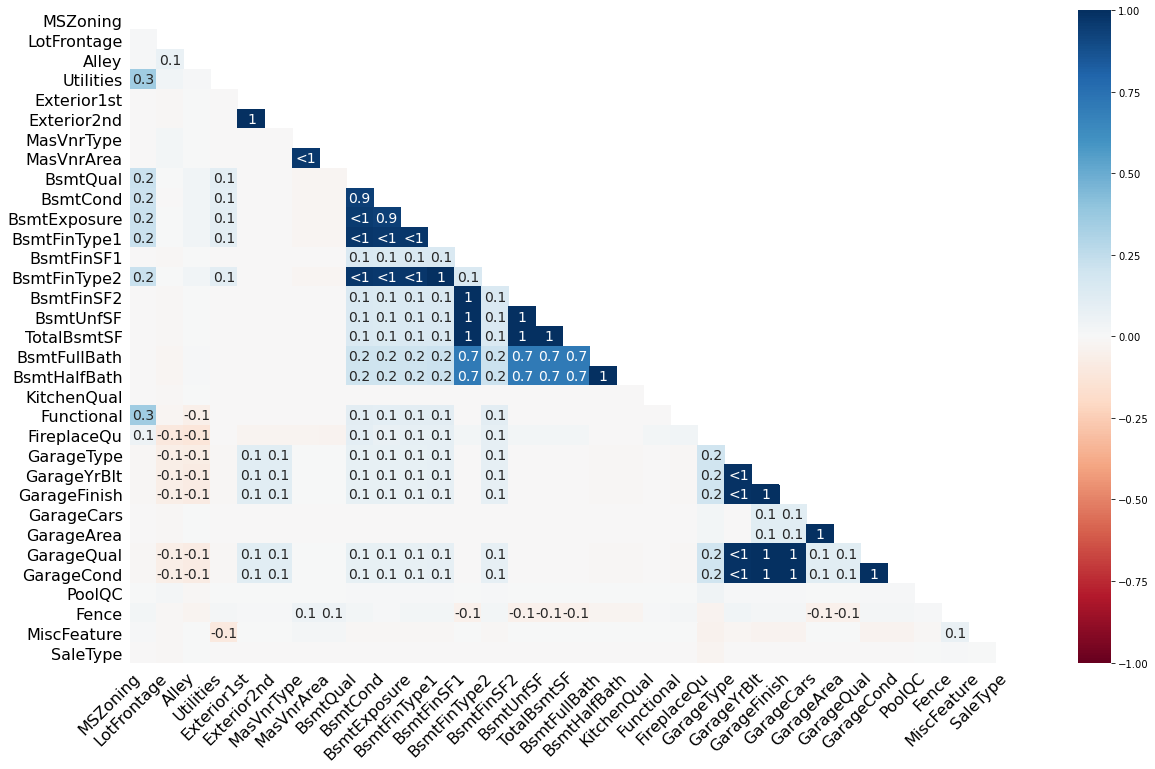

In [55]:
msno.heatmap(data_test);

In [56]:
data_test["LotFrontage"] = data_test["LotFrontage"].fillna(data_test["LotFrontage"].mean())
data_test["MasVnrArea"] = data_test["MasVnrArea"].fillna(data_test["MasVnrArea"].mean())
data_test["BsmtFinSF1"] = data_test["BsmtFinSF1"].fillna(data_test["BsmtFinSF1"].mean())
data_test["BsmtFinSF2"] = data_test["BsmtFinSF2"].fillna(data_test["BsmtFinSF2"].mean())
data_test["BsmtUnfSF"] = data_test["BsmtUnfSF"].fillna(data_test["BsmtUnfSF"].mean())
data_test["TotalBsmtSF"] = data_test["TotalBsmtSF"].fillna(data_test["TotalBsmtSF"].mean())
data_test["BsmtFullBath"] = data_test["BsmtFullBath"].fillna(data_test["BsmtFullBath"].mean())
data_test["BsmtHalfBath"] = data_test["BsmtHalfBath"].fillna(data_test["BsmtHalfBath"].mean())
data_test["GarageYrBlt"] = data_test["GarageYrBlt"].fillna(data_test["GarageYrBlt"].mean())
data_test["GarageCars"] = data_test["GarageCars"].fillna(data_test["GarageCars"].mean())
data_test["GarageArea"] = data_test["GarageArea"].fillna(data_test["GarageArea"].mean())

In [57]:
data_test.drop(columns = ["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

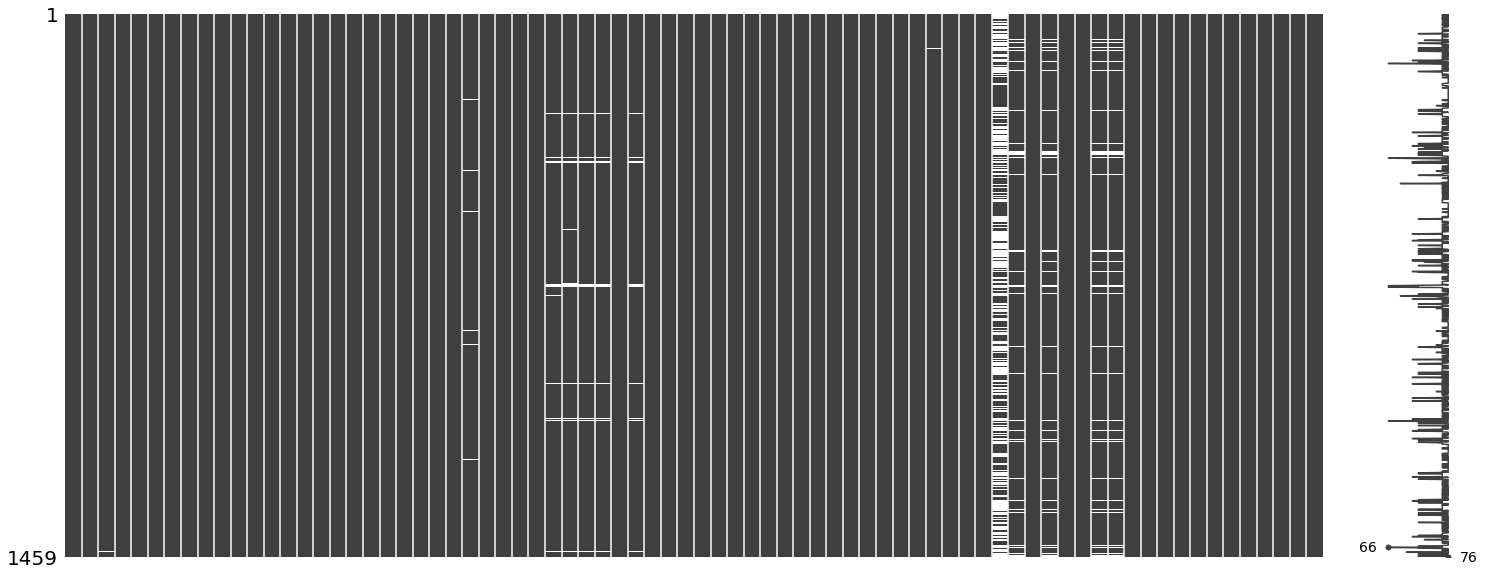

In [58]:
msno.matrix(data_test);

In [59]:
data_test = data_test.fillna("None")
data_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.000000,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.000000,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
5,1466,60,RL,75.000000,10000,Pave,IR1,Lvl,AllPub,Corner,...,84,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,68.580357,7980,Pave,IR1,Lvl,AllPub,Inside,...,21,0,0,0,0,500,3,2010,WD,Normal
7,1468,60,RL,63.000000,8402,Pave,IR1,Lvl,AllPub,Inside,...,75,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,85.000000,10176,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
9,1470,20,RL,70.000000,8400,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,4,2010,WD,Normal


In [60]:
tcat = data_test.select_dtypes(include = ["object"])
tcat.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
6,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,None,Attchd,Fin,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
8,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Po,Attchd,Unf,TA,TA,Y,WD,Normal
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,Typ,None,Attchd,Fin,TA,TA,Y,WD,Normal


In [61]:
tcat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [62]:
tcat.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [63]:
data_test[tcat.columns] = data_test[tcat.columns].apply(le.fit_transform)

In [64]:
data_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.000000,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,9,4
1,1462,20,4,81.000000,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,9,4
2,1463,60,4,74.000000,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,9,4
3,1464,60,4,78.000000,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,9,4
4,1465,120,4,43.000000,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,9,4
5,1466,60,4,75.000000,10000,1,0,3,0,0,...,84,0,0,0,0,0,4,2010,9,4
6,1467,20,4,68.580357,7980,1,0,3,0,4,...,21,0,0,0,0,500,3,2010,9,4
7,1468,60,4,63.000000,8402,1,0,3,0,4,...,75,0,0,0,0,0,5,2010,9,4
8,1469,20,4,85.000000,10176,1,3,3,0,4,...,0,0,0,0,0,0,2,2010,9,4
9,1470,20,4,70.000000,8400,1,3,3,0,0,...,0,0,0,0,0,0,4,2010,9,4


In [65]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(data_test.dtypes)

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1       float64
BsmtFinType2       int32
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating            int32
HeatingQC          int32


5.  Model Deployment

Train Set

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [67]:
#Describing the target and the explonatory variables
X = data_train.drop(columns = ['SalePrice'])
y = data_train["SalePrice"]

In [68]:
#Splitting the data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
lm = LinearRegression()
reg = lm.fit(X_train, y_train)

In [70]:
#Print the intercept
print(lm.intercept_)

1215629.3462347286


In [71]:
print(lm.coef_)

[-3.12540476e+00 -1.49425743e+02 -2.15084760e+03 -2.10824851e+02
  2.98554219e-01  1.92045412e+04 -1.11824514e+03  3.50296830e+03
 -5.35805840e+04  3.37014357e+01  1.27157621e+04  4.33733600e+02
 -3.79712775e+02 -1.03746872e+04 -2.13868220e+03 -1.25214149e+03
  1.15950852e+04  4.30017075e+03  2.09682877e+02  5.52478407e+01
  3.12621252e+03  3.63770735e+03 -1.05440121e+03  4.53125555e+02
  4.18458894e+03  2.57990067e+01 -7.88175796e+03 -9.44164259e+01
  1.56228685e+03 -4.92497378e+03  2.61389219e+03 -3.75749873e+03
 -6.75338505e+02  1.38003366e+00  9.53799574e+02  4.89040662e+00
 -4.64400003e+00  1.62644017e+00 -9.93607963e+02 -7.64004538e+01
  1.57417527e+03 -2.88755257e+02  1.92075685e+01  1.54995098e+01
 -4.89030956e+00  2.98167686e+01  8.83342829e+03 -1.40721568e+02
  3.31220299e+03 -6.75998290e+02 -2.23002624e+03 -1.07324340e+04
 -9.47311669e+03  3.24815587e+03  4.56643036e+03  5.52297708e+03
 -1.31950498e+03  3.51989402e+02 -2.29628404e+01 -1.45627240e+03
  1.12653399e+04  1.42942

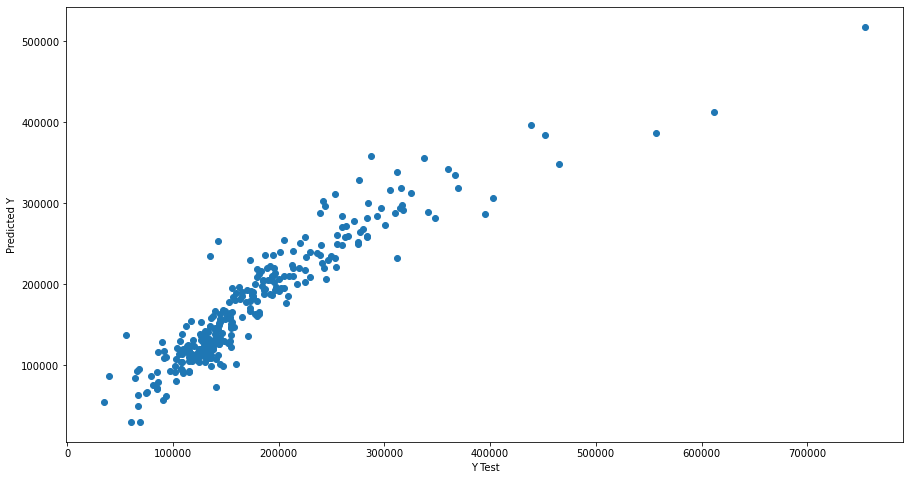

In [72]:
#Predictions from our Model
preds = lm.predict(X_test)

plt.figure(figsize=(15,8))
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [73]:
#Importing Evaluation Metrics for our model
from sklearn import metrics

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 Score:', metrics.r2_score(y_test, preds))

MAE: 21637.291888436317
MSE: 1160595158.016577
RMSE: 34067.508831973275
R2 Score: 0.8486902477590725


In [75]:
#Predicting in Kaggle's test data
preds_test_kaggle = lm.predict(data_test)

In [76]:
submission_lm2 = pd.DataFrame({"Id":data_test.Id, "SalePrice":preds_test_kaggle})
print(submission_lm2)

        Id      SalePrice
0     1461   94780.463276
1     1462  150728.917347
2     1463  158921.140821
3     1464  184936.426310
4     1465  190015.952958
...    ...            ...
1454  2915   54406.686193
1455  2916   50357.299371
1456  2917  125518.672330
1457  2918  105810.125820
1458  2919  236109.930760

[1459 rows x 2 columns]


In [77]:
submission_lm2.to_csv("lm_solution2.csv", index = False)

In [78]:
rf_params = {"max_depth" : list(range(1,10)),
            "max_features" : [3, 5, 10, 15, 30, 35, 40, 50, 60, 70, 80],
            "n_estimators" : [100, 200, 500, 1000, 2000, 2500]}

In [79]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state = 42)

In [80]:
from sklearn.model_selection import GridSearchCV
rf_cv_model = GridSearchCV(rf, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1)

In [81]:
#rf_cv_model.fit(X_train, y_train)

In [82]:
#rf_cv_model.best_params_

In [83]:
rf_tuned = RandomForestRegressor(max_depth = 9, 
                                 max_features = 30, 
                                 n_estimators = 100)

In [84]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=30)

In [85]:
preds_rf = rf_tuned.predict(X_test)

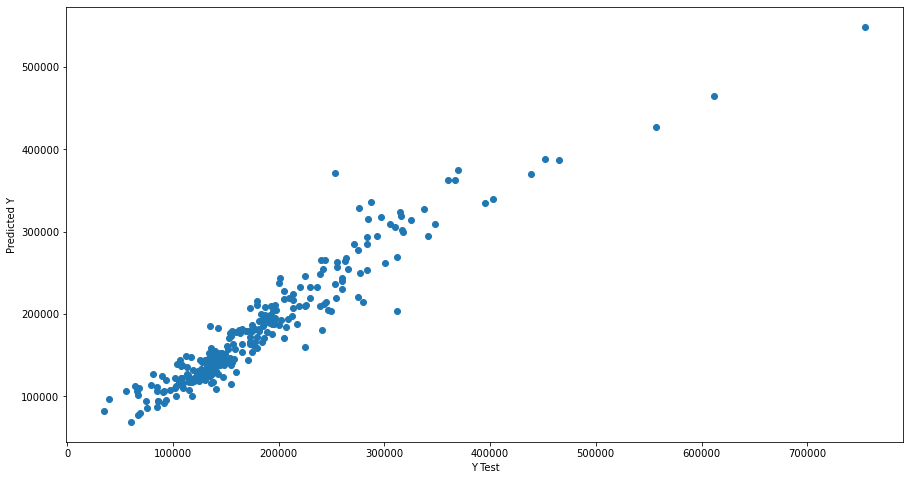

In [86]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, preds_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, preds_rf))
print('MSE:', metrics.mean_squared_error(y_test, preds_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_rf)))
print('R2 Score:', metrics.r2_score(y_test, preds_rf))

MAE: 17278.139885954115
MSE: 816216422.180967
RMSE: 28569.50160890048
R2 Score: 0.8935877823010749


In [90]:
#Predicting in Kaggle's test data
preds_rf_test_kaggle = rf_tuned.predict(data_test)

In [91]:
#Feature Importance
Importance = pd.DataFrame({"Importance" : rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Text(0.5, 0, 'Feature Importances of Variables')

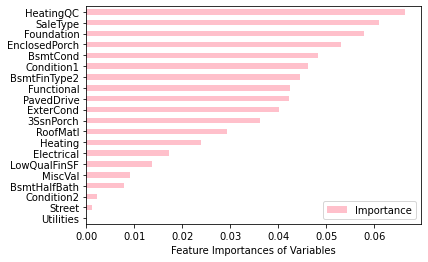

In [92]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True)[:20].plot(kind = "barh", color = "pink")
plt.xlabel("Feature Importances of Variables")

In [93]:
submission_rf2 = pd.DataFrame({"Id":data_test.Id, "SalePrice":preds_rf_test_kaggle})
print(submission_rf2)

        Id      SalePrice
0     1461  124869.679610
1     1462  154596.769362
2     1463  177438.902913
3     1464  180467.412784
4     1465  204824.420416
...    ...            ...
1454  2915   90057.188002
1455  2916   94113.706933
1456  2917  156293.335146
1457  2918  114912.712769
1458  2919  219186.856602

[1459 rows x 2 columns]


In [94]:
submission_rf2.to_csv("rf_solution2.csv", index = False)

In [95]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [97]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 9, alpha = 30, n_estimators = 1000)

In [105]:
xg_params = {"max_depth" : list(range(1,10)),
            "alpha" : [3, 5, 10, 15, 30, 35, 40, 50, 60, 70, 80],
            "n_estimators" : [100, 200, 500, 1000, 2000, 2500]}

In [106]:
xg_cv_model = GridSearchCV(xg_reg, 
                           xg_params, 
                           cv = 10, 
                           n_jobs = -1)

In [107]:
xg_cv_model.fit(X_train, y_train)

[01:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10,
             estimator=XGBRegressor(alpha=30, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.3,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.1, max_delta_step=0,
                                    max_depth=9, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=1000, n_jobs=12,
                                    num_parallel_tree=1, objective='reg:linear',
                                    predictor='auto', random_state=0,
                                    reg_alpha=30, reg_lambda=1,
                                    scale_pos_weight=1, subsam

In [108]:
xg_cv_model.best_params_

{'alpha': 3, 'max_depth': 4, 'n_estimators': 1000}

In [109]:
xg_tuned = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, alpha = 3, n_estimators = 1000)

In [110]:
xg_tuned.fit(X_train, y_train)

[01:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=3, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=3, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [111]:
preds_x = xg_tuned.predict(X_test)

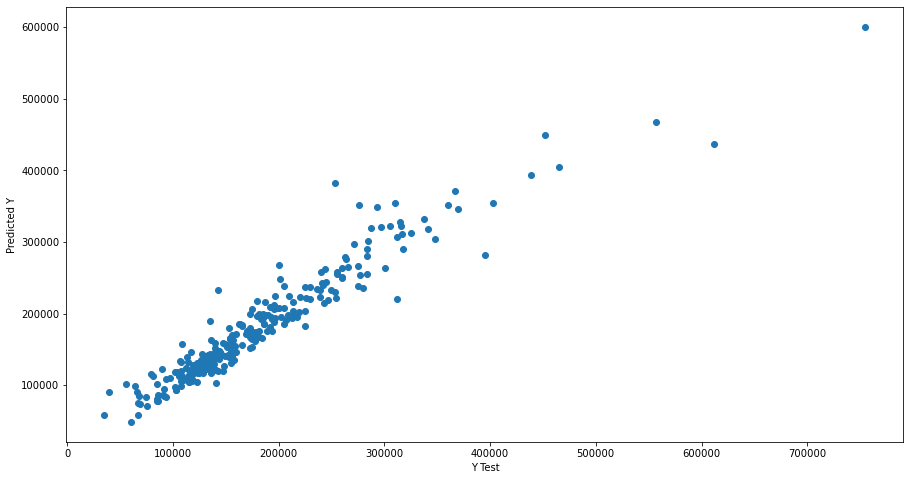

In [112]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, preds_x)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [113]:
print('MAE:', metrics.mean_absolute_error(y_test, preds_x))
print('MSE:', metrics.mean_squared_error(y_test, preds_x))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_x)))
print('R2 Score:', metrics.r2_score(y_test, preds_x))

MAE: 15799.071717144692
MSE: 699889986.831432
RMSE: 26455.433975488515
R2 Score: 0.9087535565077229


In [114]:
preds_x_test_kaggle = xg_reg.predict(data_test)

In [115]:
submission_xg = pd.DataFrame({"Id":data_test.Id, "SalePrice":preds_x_test_kaggle})
print(submission_xg)

        Id      SalePrice
0     1461  132286.968750
1     1462  144318.406250
2     1463  177369.203125
3     1464  175485.234375
4     1465  203109.750000
...    ...            ...
1454  2915   76762.734375
1455  2916   81714.171875
1456  2917  149774.000000
1457  2918  122365.398438
1458  2919  217628.421875

[1459 rows x 2 columns]


In [116]:
submission_xg.to_csv("xg_solution.csv", index = False)